# Deep Learning

# Final Project

# Product Recommendation using RNNs

### Submitted by:
#### Name      : Muhammad Amin Ghias
#### ERP ID    : 25366

Date : 7th January 2023

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense, GRU
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# To display all the columns of dataframe
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings("ignore")

from math import sqrt
from numpy import concatenate
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.utils import normalize
from tensorflow.keras.layers import MaxPooling2D, BatchNormalization

from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Activation, Dropout

from sklearn.metrics import mean_squared_error, r2_score

from tensorflow.keras import Model
from tensorflow.keras.layers import Layer

import tensorflow.keras.backend as K
from tensorflow.keras.layers import Input, Dense, SimpleRNN

import keras_tuner as kt
import tensorflow as tf


from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

from datetime import datetime

from tensorflow.keras.models import Sequential, load_model
import pickle

# RNN based Recommender system for products

## We will try 4 strategies  for our Recommender system 

### 1) Using a sequence of the items pruchased containing only unique items purchased by a customer. This will be based on descending order of the unique items purchased by the customer

### 2) Using a sequence of items purchased by a customer in order of the date ascending

### 3) Using a sequence of items purchased by a customer and a sequence of the date both seperate sequences (item sequence , time sequence) in ascending order of date

### 4) Using a sequence of items purchased by a customer and a sequence of the date  combined sequence (like item date item date ...) in ascending order of date

## Objective: 
### to Build an effective Recommendeation system that can detetct buying patterns of the customers using RNN and then give recommendation

# Importing Datasets

In [3]:
df_1=pd.read_excel('Online Retail.xlsx')
df_2=pd.read_excel('online_retail_II.xlsx')
print(df_1.shape)
print(df_2.shape)


(541909, 8)
(525461, 8)


In [4]:
df_1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df_2.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


### Data set details

data is taken from 2 datastes in UCI machine Learning reporsitory then 2 datasets have been combined

### Dataset Title: Online Retail Data Set &  Online Retail Data Set-II

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.



The data was obtained from UCI Machine Learning Repository: 

https://archive.ics.uci.edu/ml/datasets/online+retail

https://archive.ics.uci.edu/ml/datasets/Online+Retail+II



#### Attribute Information:
Input features:

InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

Description: Product (item) name. Nominal.

Quantity: The quantities of each product (item) per transaction. Numeric.

InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.

UnitPrice: Unit price. Numeric, Product price per unit in sterling.

CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

Country: Country name. Nominal, the name of the country where each customer resides.

### Making the column name of both dataframe same



In [6]:
df_1.columns.values

array(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'], dtype=object)

In [7]:
df_2.columns= df_1.columns


df_2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [8]:
print(df_2.shape)

(525461, 8)


### Combining the 2 datasets

In [9]:
df=pd.concat([df_1,df_2])
print(df.shape)
df.head()

(1067370, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


#### Dropping and NAN null values

In [10]:
df=df.dropna()
df.shape

NumExpr defaulting to 8 threads.


(824363, 8)

### Total unique products

In [11]:
df['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    5315
REGENCY CAKESTAND 3 TIER              3777
ASSORTED COLOUR BIRD ORNAMENT         2794
JUMBO BAG RED RETROSPOT               2776
LUNCH BAG  BLACK SKULL.               2161
                                      ... 
TINY CRYSTALS BRACELET BLACK             1
SILVER PURSE GOLD PINK BUTTERFLY         1
HEXAGONAL CRYSTAL PERFUME BOTTLE         1
SET OF 4 KNICK KNACK TINS  DOILEY        1
ORIGAMI LAVENDER INCENSE+FLOWER          1
Name: Description, Length: 5299, dtype: int64

In [12]:
total_products_counts= len(df['Description'].unique())
total_products_counts


5299

#### There are total 5299 unique products 

### Total number of customers

In [13]:
df['CustomerID'].value_counts()

17841.0    13097
14911.0    11613
12748.0     7307
14606.0     6709
14096.0     5128
           ...  
13841.0        1
12555.0        1
14763.0        1
17956.0        1
13017.0        1
Name: CustomerID, Length: 5942, dtype: int64

In [14]:
total_customers=len(df['CustomerID'].unique())
total_customers

5942

#### There are total 5942 customers

hence we can have maximum of 5942 customer records whose purchase sequence we can use for our recommender system

## Most poular products

In [15]:
pr= df['Description'].value_counts()
# pr.hist()
pr

WHITE HANGING HEART T-LIGHT HOLDER    5315
REGENCY CAKESTAND 3 TIER              3777
ASSORTED COLOUR BIRD ORNAMENT         2794
JUMBO BAG RED RETROSPOT               2776
LUNCH BAG  BLACK SKULL.               2161
                                      ... 
TINY CRYSTALS BRACELET BLACK             1
SILVER PURSE GOLD PINK BUTTERFLY         1
HEXAGONAL CRYSTAL PERFUME BOTTLE         1
SET OF 4 KNICK KNACK TINS  DOILEY        1
ORIGAMI LAVENDER INCENSE+FLOWER          1
Name: Description, Length: 5299, dtype: int64

<AxesSubplot: >

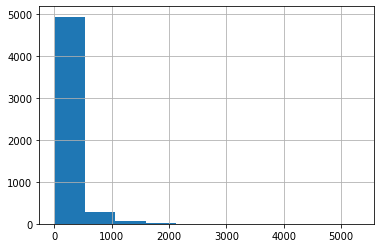

In [16]:
pr.hist()

This shows that there are some products like 'WHITE HANGING HEART T-LIGHT HOLDER' which has been sold many times while other products sold less

Top 20 products

In [17]:
top_20_products=pr.head(20)
top_20_products

WHITE HANGING HEART T-LIGHT HOLDER    5315
REGENCY CAKESTAND 3 TIER              3777
ASSORTED COLOUR BIRD ORNAMENT         2794
JUMBO BAG RED RETROSPOT               2776
LUNCH BAG  BLACK SKULL.               2161
REX CASH+CARRY JUMBO SHOPPER          2150
PARTY BUNTING                         2144
STRAWBERRY CERAMIC TRINKET BOX        2106
POSTAGE                               2018
BAKING SET 9 PIECE RETROSPOT          1976
LUNCH BAG SPACEBOY DESIGN             1961
HOME BUILDING BLOCK WORD              1948
HEART OF WICKER SMALL                 1919
LUNCH BAG CARS BLUE                   1906
60 TEATIME FAIRY CAKE CASES           1893
WOODEN FRAME ANTIQUE WHITE            1886
HEART OF WICKER LARGE                 1886
PAPER CHAIN KIT 50'S CHRISTMAS        1868
JUMBO STORAGE BAG SUKI                1799
JUMBO SHOPPER VINTAGE RED PAISLEY     1768
Name: Description, dtype: int64

#### Top 5 poular products

In [18]:
pr.head(5)

WHITE HANGING HEART T-LIGHT HOLDER    5315
REGENCY CAKESTAND 3 TIER              3777
ASSORTED COLOUR BIRD ORNAMENT         2794
JUMBO BAG RED RETROSPOT               2776
LUNCH BAG  BLACK SKULL.               2161
Name: Description, dtype: int64

In [19]:
top_5_products=pr.head(5).index.values
print(type(top_5_products))
top_5_products

<class 'numpy.ndarray'>


array(['WHITE HANGING HEART T-LIGHT HOLDER', 'REGENCY CAKESTAND 3 TIER',
       'ASSORTED COLOUR BIRD ORNAMENT', 'JUMBO BAG RED RETROSPOT',
       'LUNCH BAG  BLACK SKULL.'], dtype=object)

Customers will be shown top 5 purchased products ever

In [20]:
### Saving top 5 products
pickle.dump(top_5_products, open('top_5_products', 'wb'))

#### Least popular products

In [21]:
bottom_5_products=pr.tail(5)
bottom_5_products

TINY CRYSTALS BRACELET BLACK          1
SILVER PURSE GOLD PINK BUTTERFLY      1
HEXAGONAL CRYSTAL PERFUME BOTTLE      1
SET OF 4 KNICK KNACK TINS  DOILEY     1
ORIGAMI LAVENDER INCENSE+FLOWER       1
Name: Description, dtype: int64

In [22]:
bottom_20_products=pr.tail(20)
bottom_20_products

PEN, 10 COLOURS - SPACEBOY             1
NUMBER TILE VINTAGE FONT, 4            1
MAGIC SLATE BAKE A CAKE                1
BLUE BAROQUE FLOCK CANDLE HOLDER       1
RED WALL CLOCK                         1
PARTY PIZZA DISH RED+WHITE SPOT        1
BLUE GREEN CHRISTMAS HANGING BALL      1
DIAMANTE BOW BROOCH WHITE COLOUR       1
CHUNKY CRACKED GLAZE NECKLACE IVORY    1
INCENSE BAZAAR PEACH                   1
SEAGRASS S/3 SQU LAUNDRY BOX           1
MARIE ANTOIENETT TRINKET BOX GOLD      1
ORIGAMI LAVENDER INCENSE CONES         1
BLUE DROP EARRINGS W BEAD CLUSTER      1
11 PC CERAMIC TEA SET POLKADOT         1
TINY CRYSTALS BRACELET BLACK           1
SILVER PURSE GOLD PINK BUTTERFLY       1
HEXAGONAL CRYSTAL PERFUME BOTTLE       1
SET OF 4 KNICK KNACK TINS  DOILEY      1
ORIGAMI LAVENDER INCENSE+FLOWER        1
Name: Description, dtype: int64

In [23]:
df_copy=df.copy()# making a copy of dataet

# We will use df_copy as backup

In [24]:
df=df_copy.copy()

Note as many customers have small sequences of purchase and they bought less items also many products have been purchased less this makes model perform bad. Hence inorder to make our model better we will make our recommender system based on the sequence of purchase of poular products

## Chosing products who have been brought more than n = 1500 number of time

In [25]:
a=df['Description'].value_counts()>1500
a=a[a == True]
ind=a.index.values
len(ind)
df.shape

df=df[df['Description'].isin(ind)] # our datset has only products who are purchased more than 1500 times
df['Description'].value_counts()
print(df.shape)
len(a.index)

(67218, 8)


33

#### Creating a list of all unique products

In [26]:
unique_items=list(df['Description'].unique())
unique_items

['WHITE HANGING HEART T-LIGHT HOLDER',
 'ASSORTED COLOUR BIRD ORNAMENT',
 'HOME BUILDING BLOCK WORD',
 'LOVE BUILDING BLOCK WORD',
 'POSTAGE',
 "PAPER CHAIN KIT 50'S CHRISTMAS ",
 'WOODEN PICTURE FRAME WHITE FINISH',
 'WOODEN FRAME ANTIQUE WHITE ',
 'RED HANGING HEART T-LIGHT HOLDER',
 'JUMBO  BAG BAROQUE BLACK WHITE',
 'LUNCH BAG RED RETROSPOT',
 'PACK OF 60 PINK PAISLEY CAKE CASES',
 '60 TEATIME FAIRY CAKE CASES',
 'JUMBO STORAGE BAG SUKI',
 'JUMBO SHOPPER VINTAGE RED PAISLEY',
 'NATURAL SLATE HEART CHALKBOARD ',
 'HEART OF WICKER SMALL',
 'HEART OF WICKER LARGE',
 'JUMBO BAG RED RETROSPOT',
 'STRAWBERRY CERAMIC TRINKET BOX',
 'CHOCOLATE HOT WATER BOTTLE',
 'SCOTTIE DOG HOT WATER BOTTLE',
 'LUNCH BAG SPACEBOY DESIGN ',
 'LUNCH BAG WOODLAND',
 'LUNCH BAG CARS BLUE',
 'LUNCH BAG  BLACK SKULL.',
 'VICTORIAN GLASS HANGING T-LIGHT',
 'JUMBO BAG STRAWBERRY',
 'REX CASH+CARRY JUMBO SHOPPER',
 'VINTAGE SNAP CARDS',
 'REGENCY CAKESTAND 3 TIER',
 'PARTY BUNTING',
 'BAKING SET 9 PIECE RETROSPOT

In [27]:

#### Saving this list
pickle.dump(unique_items, open('unique_items', 'wb'))

In [28]:
num_classes=34 # our classes will start from 1 to 34

Now there are 34 most popular proucts bought more than 1500 times

### For this recommender system we will consdier only those items who have been purchased more than 1500 times hence this leaves us with 34 products which we recommend for our customers

In [29]:
df.Description.value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    5315
REGENCY CAKESTAND 3 TIER              3777
ASSORTED COLOUR BIRD ORNAMENT         2794
JUMBO BAG RED RETROSPOT               2776
LUNCH BAG  BLACK SKULL.               2161
REX CASH+CARRY JUMBO SHOPPER          2150
PARTY BUNTING                         2144
STRAWBERRY CERAMIC TRINKET BOX        2106
POSTAGE                               2018
BAKING SET 9 PIECE RETROSPOT          1976
LUNCH BAG SPACEBOY DESIGN             1961
HOME BUILDING BLOCK WORD              1948
HEART OF WICKER SMALL                 1919
LUNCH BAG CARS BLUE                   1906
60 TEATIME FAIRY CAKE CASES           1893
HEART OF WICKER LARGE                 1886
WOODEN FRAME ANTIQUE WHITE            1886
PAPER CHAIN KIT 50'S CHRISTMAS        1868
JUMBO STORAGE BAG SUKI                1799
JUMBO SHOPPER VINTAGE RED PAISLEY     1768
RED HANGING HEART T-LIGHT HOLDER      1763
WOODEN PICTURE FRAME WHITE FINISH     1756
NATURAL SLATE HEART CHALKBOARD        1725
LUNCH BAG W

In [30]:
df.CustomerID.value_counts()

17841.0    694
14911.0    668
17850.0    492
13089.0    429
12748.0    424
          ... 
14782.0      1
16586.0      1
17331.0      1
13346.0      1
17934.0      1
Name: CustomerID, Length: 4908, dtype: int64

### Doing label encoding of Description

In [31]:
label_encoder = preprocessing.LabelEncoder()

description_label=label_encoder.fit(df['Description'])
df_desc=description_label.transform(df['Description'])



df_desc



array([30,  1,  6, ...,  0, 25, 11])

#### Inverse transform from labels back to description

In [32]:
ar=np.array([6])
ar.shape
description_label.inverse_transform(ar)

array(['HOME BUILDING BLOCK WORD'], dtype=object)

In [33]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [34]:
df_desc+1

array([31,  2,  7, ...,  1, 26, 12])

In [35]:
# Encode labels are placed in column 'Description'.adding 1 to make labels start from 1
df['Description']= df_desc+1

df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,31,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
9,536367,84879,2,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


### Finding unique customer ids

In [36]:
unique_items_n=df['Description'].unique()
unique_items_n

array([31,  2,  7, 13, 23, 21, 33, 32, 24,  8, 16, 20,  1, 12, 11, 19,  6,
        5,  9, 28,  4, 27, 17, 18, 15, 14, 29, 10, 26, 30, 25, 22,  3])

#### Making a datafram for labels and its description

In [37]:
descript=pd.DataFrame({'items_description':unique_items,'items_label':unique_items_n})

descript.head()

,items_description,items_label
0,WHITE HANGING HEART T-LIGHT HOLDER,31
1,ASSORTED COLOUR BIRD ORNAMENT,2
2,HOME BUILDING BLOCK WORD,7
3,LOVE BUILDING BLOCK WORD,13
4,POSTAGE,23


In [38]:
descript.to_csv('labels.csv',index=False)

In [39]:
## Inverse of label encoder
label=7
n=label-1 # Subtarcting 1 as we had added one

ar=np.array([n])
ar.shape
description_label.inverse_transform(ar)

array(['HOME BUILDING BLOCK WORD'], dtype=object)

In [40]:
s=descript.items_label[descript['items_description']=='HOME BUILDING BLOCK WORD'].values
s=int(s)
s

7

In [41]:
a=df['CustomerID'].value_counts()
unique_customers=a.index.values
len(unique_customers)

4908

# Strategies for Recommendation System

# Making a sequence

In [42]:
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,31,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom


## Strategy 1

### Making a dataframe grouped by customerID and all the unique products formed in a list

In [43]:
cf=df.copy()
cf=cf[['Description','CustomerID']]
cf.head()

# Groupby customer ID and aggeregate by making a list of description all the unique items purchases
abf=cf.groupby('CustomerID').agg({"Description": (lambda x: list(x.value_counts().index))}) 
abf.head()

,Description
CustomerID,
12347.0,"[25, 1]"
12348.0,"[23, 1, 20]"
12349.0,"[23, 28, 2, 19, 25]"
12350.0,[23]
12352.0,"[23, 25, 13, 28, 3, 7, 29]"


### Adding a column to tell how many unique products customer has purchased

In [44]:
def f1(v):
    return(len(v))


abf['unique_products_length']=abf['Description'].apply(f1)


abf.head()

,Description,unique_products_length
CustomerID,,
12347.0,"[25, 1]",2
12348.0,"[23, 1, 20]",3
12349.0,"[23, 28, 2, 19, 25]",5
12350.0,[23],1
12352.0,"[23, 25, 13, 28, 3, 7, 29]",7


#### Max length of sequence of purchase of a cuatomer

In [45]:
abf['unique_products_length'].max()

33

In [46]:
abf[abf['unique_products_length']==abf['unique_products_length'].max()]

,Description,unique_products_length
CustomerID,,
12748.0,"[26, 14, 21, 17, 10, 31, 9, 18, 25, 22, 15, 19, 12, 11, 32, 30, 1, 16, 8, 2, 5, 3, 20, 6, 28, 4, 13, 27, 33, 23, 7, 29, 24]",33


In [47]:
x_s1=abf.loc[12748.0,'Description']

x_s1=np.array(x_s1)
x_s1

array([26, 14, 21, 17, 10, 31,  9, 18, 25, 22, 15, 19, 12, 11, 32, 30,  1,
       16,  8,  2,  5,  3, 20,  6, 28,  4, 13, 27, 33, 23,  7, 29, 24])

### making a sequence dataframe

In [48]:
item_sequence_length=30

# df_n=abf[abf['unique_products_length']>item_sequence_length]

df_n=abf.copy()

print(df_n.shape)


for i in range(item_sequence_length):
    # print(i)

    def f1(v):
        try:
            return(v[i])
        except:
            return(0) # will be added as a padding

    df_n['item-'+str(i)]=df_n['Description'].apply(f1)
    
df_n.head()


def f2(v):
    try:
        
        return(v[item_sequence_length])
    except:
        return(0)  # will be added as a padding



df_n['target']=df_n['Description'].apply(f2)


df_n.head()

(4908, 2)


,Description,unique_products_length,item-0,item-1,item-2,item-3,item-4,item-5,item-6,item-7,item-8,item-9,item-10,item-11,item-12,item-13,item-14,item-15,item-16,item-17,item-18,item-19,item-20,item-21,item-22,item-23,item-24,item-25,item-26,item-27,item-28,item-29,target
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347.0,"[25, 1]",2,25,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12348.0,"[23, 1, 20]",3,23,1,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12349.0,"[23, 28, 2, 19, 25]",5,23,28,2,19,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12350.0,[23],1,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12352.0,"[23, 25, 13, 28, 3, 7, 29]",7,23,25,13,28,3,7,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Removing extra columns

In [49]:
df_seq_sn=df_n.copy()

df_seq_sn.columns

df_seq_sn=df_seq_sn.drop(columns=['Description', 'unique_products_length'])

df_seq_sn.head()

,item-0,item-1,item-2,item-3,item-4,item-5,item-6,item-7,item-8,item-9,item-10,item-11,item-12,item-13,item-14,item-15,item-16,item-17,item-18,item-19,item-20,item-21,item-22,item-23,item-24,item-25,item-26,item-27,item-28,item-29,target
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347.0,25,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12348.0,23,1,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12349.0,23,28,2,19,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12350.0,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12352.0,23,25,13,28,3,7,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Reversing columns order of dataframe to correct order

In [50]:
df_seq_sn= df_seq_sn.reindex(columns=df_seq_sn.columns[::-1])
df_seq_sn.head(2)

,target,item-29,item-28,item-27,item-26,item-25,item-24,item-23,item-22,item-21,item-20,item-19,item-18,item-17,item-16,item-15,item-14,item-13,item-12,item-11,item-10,item-9,item-8,item-7,item-6,item-5,item-4,item-3,item-2,item-1,item-0
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,25
12348.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,1,23


In [51]:
df_seq_sn.shape

(4908, 31)

In [52]:
df_seq_sn.tail(2)

,target,item-29,item-28,item-27,item-26,item-25,item-24,item-23,item-22,item-21,item-20,item-19,item-18,item-17,item-16,item-15,item-14,item-13,item-12,item-11,item-10,item-9,item-8,item-7,item-6,item-5,item-4,item-3,item-2,item-1,item-0
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
18286.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,14,29,12,25,8
18287.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,28,27


In [53]:
df_seq_sn.to_csv('df_seqsn1.csv',index=False)

### Making a dataframe grouped by customerID and all the sequence products and time formed in a list

In [54]:
date_min=df.InvoiceDate.min()

In [55]:
cf=df.copy()

date_min=df.InvoiceDate.min()

def f1(v):
    return((v-date_min).days)

cf['time']=cf['InvoiceDate'].apply(f1)

cf=cf[['Description','CustomerID','time']]
cf.head()



cbf=cf.groupby('CustomerID').agg({"Description": (lambda x: list(x)),"time": (lambda x: list(x))})
cbf.head()

,Description,time
CustomerID,,
12347.0,"[1, 25, 25, 1, 25, 25, 1, 1, 25]","[421, 421, 492, 609, 609, 699, 699, 334, 334]"
12348.0,"[1, 1, 20, 20, 23, 23, 23, 23, 1, 20, 23]","[380, 380, 380, 380, 380, 420, 490, 663, 300, 300, 300]"
12349.0,"[25, 23, 28, 28, 23, 28, 19, 2, 23]","[720, 720, 3, 149, 168, 331, 331, 331, 331]"
12350.0,[23],[428]
12352.0,"[28, 25, 13, 7, 23, 3, 23, 25, 23, 13, 23, 29, 23, 25, 13, 28]","[442, 442, 442, 442, 455, 455, 476, 658, 658, 666, 666, 702, 702, 363, 363, 363]"


In [56]:
cbf.shape

(4908, 2)

### Adding a column to tell how many  products customer has purchased

In [57]:
def f1(v):
    return(len(v))


cbf['products_length']=cbf['Description'].apply(f1)


cbf.head()

,Description,time,products_length
CustomerID,,,
12347.0,"[1, 25, 25, 1, 25, 25, 1, 1, 25]","[421, 421, 492, 609, 609, 699, 699, 334, 334]",9
12348.0,"[1, 1, 20, 20, 23, 23, 23, 23, 1, 20, 23]","[380, 380, 380, 380, 380, 420, 490, 663, 300, 300, 300]",11
12349.0,"[25, 23, 28, 28, 23, 28, 19, 2, 23]","[720, 720, 3, 149, 168, 331, 331, 331, 331]",9
12350.0,[23],[428],1
12352.0,"[28, 25, 13, 7, 23, 3, 23, 25, 23, 13, 23, 29, 23, 25, 13, 28]","[442, 442, 442, 442, 455, 455, 476, 658, 658, 666, 666, 702, 702, 363, 363, 363]",16


In [58]:
cbf[cbf['products_length']==cbf['products_length'].max()]

,Description,time,products_length
CustomerID,,,
17841.0,"[4, 27, 5, 12, 12, 4, 26, 9, 32, 32, 11, 9, 1, 33, 9, 5, 31, 8, 4, 24, 5, 16, 6, 5, 10, 5, 19, 10, 10, 6, 5, 14, 17, 16, 18, 15, 12, 14, 5, 8, 11, 10, 9, 12, 12, 31, 18, 22, 14, 17, 19, 16, 17, 17, 11, 31, 19, 22, 15, 14, 17, 16, 15, 22, 33, 15, 18, 14, 11, 17, 16, 14, 15, 22, 19, 11, 9, 31, 18, 12, 19, 20, 16, 8, 17, 19, 12, 18, 15, 14, 14, 16, 12, 24, 22, 28, 30, 9, 15, 14, ...]","[365, 365, 365, 370, 373, 378, 378, 383, 383, 399, 399, 399, 404, 404, 404, 407, 407, 411, 411, 411, 411, 421, 425, 425, 425, 428, 448, 448, 454, 454, 454, 457, 457, 457, 457, 457, 461, 461, 461, 464, 464, 464, 464, 464, 464, 464, 464, 468, 468, 468, 468, 472, 472, 482, 482, 482, 485, 485, 485, 485, 485, 485, 485, 490, 490, 490, 490, 490, 496, 496, 496, 496, 496, 496, 499, 499, 499, 503, 512, 512, 512, 512, 518, 518, 518, 518, 518, 518, 518, 518, 521, 521, 521, 521, 521, 525, 525, 525, 525, 525, ...]",694


## Strategy 2

## make sequence dataframe for items(only) sequence in series 

In [59]:
item_sequence_length=30

# df_n=cbf[cbf['unique_products_length']>item_sequence_length]

df_n=cbf.copy()

print(df_n.shape)


for i in range(item_sequence_length):
    # print(i)

    def f1(v):
        try:
            return(v[i])
        except:
            return(0) # will be added as a padding

    df_n['item-'+str(i)]=df_n['Description'].apply(f1)
    
df_n.head()


def f2(v):
    try:
        
        return(v[item_sequence_length])
    except:
        return(0)  # will be added as a padding



df_n['target']=df_n['Description'].apply(f2)


df_n.head(2)

(4908, 3)


,Description,time,products_length,item-0,item-1,item-2,item-3,item-4,item-5,item-6,item-7,item-8,item-9,item-10,item-11,item-12,item-13,item-14,item-15,item-16,item-17,item-18,item-19,item-20,item-21,item-22,item-23,item-24,item-25,item-26,item-27,item-28,item-29,target
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347.0,"[1, 25, 25, 1, 25, 25, 1, 1, 25]","[421, 421, 492, 609, 609, 699, 699, 334, 334]",9,1,25,25,1,25,25,1,1,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12348.0,"[1, 1, 20, 20, 23, 23, 23, 23, 1, 20, 23]","[380, 380, 380, 380, 380, 420, 490, 663, 300, 300, 300]",11,1,1,20,20,23,23,23,23,1,20,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Removing extra columns

In [60]:
df_seq_sn2=df_n.copy()

df_seq_sn2.columns

df_seq_sn2=df_seq_sn2.drop(columns=['Description', 'products_length','time'])

df_seq_sn2.head()

,item-0,item-1,item-2,item-3,item-4,item-5,item-6,item-7,item-8,item-9,item-10,item-11,item-12,item-13,item-14,item-15,item-16,item-17,item-18,item-19,item-20,item-21,item-22,item-23,item-24,item-25,item-26,item-27,item-28,item-29,target
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347.0,1,25,25,1,25,25,1,1,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12348.0,1,1,20,20,23,23,23,23,1,20,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12349.0,25,23,28,28,23,28,19,2,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12350.0,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12352.0,28,25,13,7,23,3,23,25,23,13,23,29,23,25,13,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Reversing order of columns to correct the order

In [61]:
df_seq_sn2= df_seq_sn2.reindex(columns=df_seq_sn2.columns[::-1])
df_seq_sn2.head(2)

,target,item-29,item-28,item-27,item-26,item-25,item-24,item-23,item-22,item-21,item-20,item-19,item-18,item-17,item-16,item-15,item-14,item-13,item-12,item-11,item-10,item-9,item-8,item-7,item-6,item-5,item-4,item-3,item-2,item-1,item-0
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,1,1,25,25,1,25,25,1
12348.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23,20,1,23,23,23,23,20,20,1,1


## Strategy 3

## make a seperate sequence dataframe for items + time in series 

In [62]:
item_sequence_length=40

# df_n=cbf[cbf['unique_products_length']>item_sequence_length]

df_n=cbf.copy()

print(df_n.shape)

i=0

while i < 19:

    for j in range(2):
        # print(i)

        def f1(v):
            try:
                return(v[j+i])
            except:
                return(0) # will be added as a padding

        df_n['item-'+str(j+i)]=df_n['Description'].apply(f1)
        
        
        
    for k in range(2):
        # print(i)

        def f1(v):
            try:
                return(v[k+i])
            except:
                return(0) # will be added as a padding

        df_n['time-'+str(k+i)]=df_n['time'].apply(f1)
        
    i=i+2


    
df_n.head()

print(df_n.shape)


def f2(v):
    try:
        
        return(v[item_sequence_length//2])
    except:
        return(0)  # will be added as a padding



df_n['target']=df_n['Description'].apply(f2)


df_n.head(2)

(4908, 3)
(4908, 43)


,Description,time,products_length,item-0,item-1,time-0,time-1,item-2,item-3,time-2,time-3,item-4,item-5,time-4,time-5,item-6,item-7,time-6,time-7,item-8,item-9,time-8,time-9,item-10,item-11,time-10,time-11,item-12,item-13,time-12,time-13,item-14,item-15,time-14,time-15,item-16,item-17,time-16,time-17,item-18,item-19,time-18,time-19,target
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347.0,"[1, 25, 25, 1, 25, 25, 1, 1, 25]","[421, 421, 492, 609, 609, 699, 699, 334, 334]",9,1,25,421,421,25,1,492,609,25,25,609,699,1,1,699,334,25,0,334,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12348.0,"[1, 1, 20, 20, 23, 23, 23, 23, 1, 20, 23]","[380, 380, 380, 380, 380, 420, 490, 663, 300, 300, 300]",11,1,1,380,380,20,20,380,380,23,23,380,420,23,23,490,663,1,20,300,300,23,0,300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Removing extra columns

In [63]:
df_n.shape

(4908, 44)

In [64]:
df_seq_sn3=df_n.copy()

df_seq_sn3.columns

df_seq_sn3=df_seq_sn3.drop(columns=['Description', 'products_length','time'])

df_seq_sn3.head()

,item-0,item-1,time-0,time-1,item-2,item-3,time-2,time-3,item-4,item-5,time-4,time-5,item-6,item-7,time-6,time-7,item-8,item-9,time-8,time-9,item-10,item-11,time-10,time-11,item-12,item-13,time-12,time-13,item-14,item-15,time-14,time-15,item-16,item-17,time-16,time-17,item-18,item-19,time-18,time-19,target
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347.0,1,25,421,421,25,1,492,609,25,25,609,699,1,1,699,334,25,0,334,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12348.0,1,1,380,380,20,20,380,380,23,23,380,420,23,23,490,663,1,20,300,300,23,0,300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12349.0,25,23,720,720,28,28,3,149,23,28,168,331,19,2,331,331,23,0,331,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12350.0,23,0,428,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12352.0,28,25,442,442,13,7,442,442,23,3,455,455,23,25,476,658,23,13,658,666,23,29,666,702,23,25,702,363,13,28,363,363,0,0,0,0,0,0,0,0,0


#### Reversing order of columns to correct the order

In [65]:
df_seq_sn3= df_seq_sn3.reindex(columns=df_seq_sn3.columns[::-1])
df_seq_sn3.head(2)

,target,time-19,time-18,item-19,item-18,time-17,time-16,item-17,item-16,time-15,time-14,item-15,item-14,time-13,time-12,item-13,item-12,time-11,time-10,item-11,item-10,time-9,time-8,item-9,item-8,time-7,time-6,item-7,item-6,time-5,time-4,item-5,item-4,time-3,time-2,item-3,item-2,time-1,time-0,item-1,item-0
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,334,0,25,334,699,1,1,699,609,25,25,609,492,1,25,421,421,25,1
12348.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,300,0,23,300,300,20,1,663,490,23,23,420,380,23,23,380,380,20,20,380,380,1,1


In [66]:
df_seq_sn3.shape

(4908, 41)

## Strategy 4

## make a combined sequecne dataframe for items + time in series (consecutive)

In [67]:
item_sequence_length=40

# df_n=cbf[cbf['unique_products_length']>item_sequence_length]

df_n=cbf.copy()

print(df_n.shape)


for i in range(item_sequence_length//2):
    # print(i)

    def f1(v):
        try:
            return(v[i])
        except:
            return(0) # will be added as a padding

    df_n['item-'+str(i)]=df_n['Description'].apply(f1)
    df_n['time-'+str(i)]=df_n['time'].apply(f1)
    
df_n.head()


def f2(v):
    try:
        
        return(v[(item_sequence_length//2)])
    except:
        return(0)  # will be added as a padding



df_n['target']=df_n['Description'].apply(f2)


df_n.head(2)

(4908, 3)


,Description,time,products_length,item-0,time-0,item-1,time-1,item-2,time-2,item-3,time-3,item-4,time-4,item-5,time-5,item-6,time-6,item-7,time-7,item-8,time-8,item-9,time-9,item-10,time-10,item-11,time-11,item-12,time-12,item-13,time-13,item-14,time-14,item-15,time-15,item-16,time-16,item-17,time-17,item-18,time-18,item-19,time-19,target
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347.0,"[1, 25, 25, 1, 25, 25, 1, 1, 25]","[421, 421, 492, 609, 609, 699, 699, 334, 334]",9,1,421,25,421,25,492,1,609,25,609,25,699,1,699,1,334,25,334,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12348.0,"[1, 1, 20, 20, 23, 23, 23, 23, 1, 20, 23]","[380, 380, 380, 380, 380, 420, 490, 663, 300, 300, 300]",11,1,380,1,380,20,380,20,380,23,380,23,420,23,490,23,663,1,300,20,300,23,300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Removing extra columns

In [68]:
df_n.shape

(4908, 44)

In [69]:
df_seq_sn4=df_n.copy()

df_seq_sn4.columns

df_seq_sn4=df_seq_sn4.drop(columns=['Description', 'products_length','time'])

df_seq_sn4.head()

,item-0,time-0,item-1,time-1,item-2,time-2,item-3,time-3,item-4,time-4,item-5,time-5,item-6,time-6,item-7,time-7,item-8,time-8,item-9,time-9,item-10,time-10,item-11,time-11,item-12,time-12,item-13,time-13,item-14,time-14,item-15,time-15,item-16,time-16,item-17,time-17,item-18,time-18,item-19,time-19,target
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347.0,1,421,25,421,25,492,1,609,25,609,25,699,1,699,1,334,25,334,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12348.0,1,380,1,380,20,380,20,380,23,380,23,420,23,490,23,663,1,300,20,300,23,300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12349.0,25,720,23,720,28,3,28,149,23,168,28,331,19,331,2,331,23,331,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12350.0,23,428,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12352.0,28,442,25,442,13,442,7,442,23,455,3,455,23,476,25,658,23,658,13,666,23,666,29,702,23,702,25,363,13,363,28,363,0,0,0,0,0,0,0,0,0


#### Reversing order of columns to correct the order

In [70]:
df_seq_sn4= df_seq_sn4.reindex(columns=df_seq_sn4.columns[::-1])
df_seq_sn4.head(2)

,target,time-19,item-19,time-18,item-18,time-17,item-17,time-16,item-16,time-15,item-15,time-14,item-14,time-13,item-13,time-12,item-12,time-11,item-11,time-10,item-10,time-9,item-9,time-8,item-8,time-7,item-7,time-6,item-6,time-5,item-5,time-4,item-4,time-3,item-3,time-2,item-2,time-1,item-1,time-0,item-0
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,334,25,334,1,699,1,699,25,609,25,609,1,492,25,421,25,421,1
12348.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,300,23,300,20,300,1,663,23,490,23,420,23,380,23,380,20,380,20,380,1,380,1


In [71]:
df_seq_sn4.shape

(4908, 41)

Saving the sequences made

In [72]:
df_seq_sn2.to_csv('df_seqsn2.csv',index=False)
df_seq_sn3.to_csv('df_seqsn3.csv',index=False)
df_seq_sn4.to_csv('df_seqsn4.csv',index=False)

## Making train test datasets

### function for making train test dataset

In [73]:
df_seq_sn.shape

(4908, 31)

In [74]:
# df_seq_sn.reverse()

In [75]:
def train_test(dataset,number_features,number_times_repeat):
    train_percent=70

    data=dataset.values

    # max_len=n_hours=10
    
    n_hours=number_times_repeat
    # n_features=5 
    n_features=number_features


    train_percent =train_percent/100
    print(train_percent)
    print(len(data))

    split_percent= round(train_percent * len(data))
    print(split_percent)


    train = data[:split_percent, :]
    print('train',train.shape)
    test = data[split_percent:, :]
    print(test.shape)

    output_at_time=1
    # split into input and outputs
    n_obs = n_hours * n_features
    trainX, trainy = train[:, :n_obs], train[:, -output_at_time]
    testX, testy = test[:, :n_obs], test[:, -output_at_time]

    print(trainX.shape, len(trainX), trainy.shape)
    
    # reshape input to be 3D [samples, timesteps, features]
    trainX = trainX.reshape((trainX.shape[0], n_hours, n_features))
    testX = testX.reshape((testX.shape[0], n_hours, n_features))
    print(trainX.shape, trainy.shape, testX.shape, testy.shape)

    trainy=tf.keras.utils.to_categorical(trainy, num_classes)
    testy = tf.keras.utils.to_categorical(testy, num_classes)
    
    return(trainX, trainy,testX, testy)

#### for startegy 1 making train/test data

In [76]:
df_seq_sn.shape

(4908, 31)

In [77]:
num_classes

34

In [78]:
# train_test(dataset,number_features,number_times_repeat)
trainX1, trainy1,testX1, testy1 =train_test(df_seq_sn,5,6)

0.7
4908
3436
train (3436, 31)
(1472, 31)
(3436, 30) 3436 (3436,)
(3436, 6, 5) (3436,) (1472, 6, 5) (1472,)


#### for startegy 2 making train/test data

In [79]:
df_seq_sn2.shape

(4908, 31)

In [80]:
# train_test(dataset,number_features,number_times_repeat)
trainX2, trainy2,testX2, testy2 =train_test(df_seq_sn2,5,6)

0.7
4908
3436
train (3436, 31)
(1472, 31)
(3436, 30) 3436 (3436,)
(3436, 6, 5) (3436,) (1472, 6, 5) (1472,)


#### for startegy 3 making train/test data

In [81]:
df_seq_sn3.shape

(4908, 41)

In [82]:
# train_test(dataset,number_features,number_times_repeat)
trainX3, trainy3,testX3, testy3 =train_test(df_seq_sn3,4,10)

0.7
4908
3436
train (3436, 41)
(1472, 41)
(3436, 40) 3436 (3436,)
(3436, 10, 4) (3436,) (1472, 10, 4) (1472,)


#### for startegy 4 making train/test data

In [83]:
df_seq_sn4.shape

(4908, 41)

In [84]:
# train_test(dataset,number_features,number_times_repeat)
trainX4, trainy4,testX4, testy4 =train_test(df_seq_sn4,4,10)

0.7
4908
3436
train (3436, 41)
(1472, 41)
(3436, 40) 3436 (3436,)
(3436, 10, 4) (3436,) (1472, 10, 4) (1472,)


# Making a Model

In [85]:
df_r=pd.DataFrame(columns=['modle_name','number_units','learing_rate','epochs','test_accuracy'])

df_r

,modle_name,number_units,learing_rate,epochs,test_accuracy


## Function for a model shallow network model

In [86]:
def model_LSTM_shallow(name,units_LSTM, batch_size,epoch,trainX, trainy, testX, testy, learning_rate_LSTM, optimizer='adam'):
    
    # design network
    model = Sequential()
    model.add(LSTM(units=units_LSTM, input_shape=(trainX.shape[1], trainX.shape[2])))
    
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(num_classes,activation="softmax"))
    
    opt = tf.keras.optimizers.Adam(learning_rate=learning_rate_LSTM)
  
    model.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])

    model.summary()
    
    # fit network
 
    es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=15, baseline=0.01, restore_best_weights=True)



    filepath = 'model_'+str(name)+'_'+str(units_LSTM)+'_'+str(learning_rate_LSTM)+'.hdf5'
#     filepath = 'my_best_model.hdf5'
    checkpoint = ModelCheckpoint( 
                                filepath=filepath,
                                 monitor='val_accuracy',
                                 verbose=1, 
                                 save_best_only=True,
                                 mode='max')
    now = datetime.now
    
    t= now()

    history = model.fit(trainX, trainy, epochs=epoch, batch_size=batch_size, 
                        validation_data=(testX, testy), verbose=2, shuffle=False,
                        callbacks=[checkpoint,es])
    
    print('Training time: %s' % (now() - t))
 
    
    model_w= load_model(filepath)
    
    score = model_w.evaluate(testX, testy, verbose=0)
    print('Test score:', score[0])
    print('Test accuracy:', score[1])

    # list all data in history
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    global df_r
    
    df_r=df_r.append({'modle_name':name,'number_units':units_LSTM,'learing_rate': learning_rate_LSTM,
                      'epochs':epoch,'test_accuracy':score[1]},ignore_index=True)

    
    
    return(history,model)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               42400     
_________________________________________________________________
batch_normalization (BatchNo (None, 100)               400       
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 34)                3434      
Total params: 46,234
Trainable params: 46,034
Non-trainable params: 200
_________________________________________________________________
Epoch 1/50

Epoch 00001: val_accuracy improved from -inf to 0.01630, saving model to model_ model_LSTM_shallow_s1_100_0.001.hdf5
7/7 - 1s - loss: 4.5733 - accuracy: 0.0320 - val_loss: 3.5645 - val_accuracy: 0.0163
Epoch 2/50

Epoch 00002: val_accur

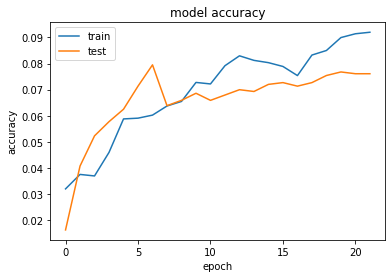

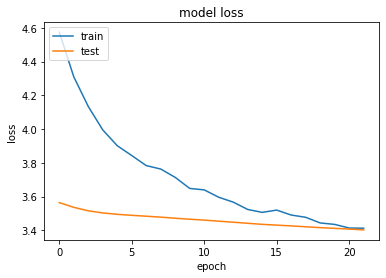

In [87]:
# model_LSTM_shallow(units_LSTM, batch_size,epoch,trainX, trainy, testX, testy, learning_rate_LSTM, optimizer='adam')
hist_LSTM_shallow_s1, model_LSTM_shallow_s1  = model_LSTM_shallow(' model_LSTM_shallow_s1',100,512,50,trainX1,trainy1,testX1,testy1,0.001)

In [88]:
df_r

,modle_name,number_units,learing_rate,epochs,test_accuracy
0,model_LSTM_shallow_s1,100,0.001,50,0.079484


## Function for a model deep network model

In [89]:
def model_LSTM_deep(name,units_LSTM, batch_size,epoch,trainX, trainy, testX, testy, learning_rate_LSTM, optimizer='adam'):
    
    # design network
    model = Sequential()
    model.add(LSTM(units=units_LSTM*2, return_sequences=True, input_shape=(trainX.shape[1], trainX.shape[2])))
    
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(LSTM(units_LSTM, return_sequences=False))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(num_classes*2))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(num_classes,activation="softmax"))

    opt = tf.keras.optimizers.Adam(learning_rate=learning_rate_LSTM)
 
    model.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])

    model.summary()
    # fit network
 
    es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=15, baseline=0.01, restore_best_weights=True)



    filepath = 'model_'+str('model_LSTM_deep')+'_'+str(units_LSTM)+'_'+str(learning_rate_LSTM)+'.hdf5'
#     filepath = 'my_best_model.hdf5'
    checkpoint = ModelCheckpoint( 
                                filepath=filepath,
                                 monitor='val_accuracy',
                                 verbose=1, 
                                 save_best_only=True,
                                 mode='max')
    now = datetime.now
    
    t= now()

    history = model.fit(trainX, trainy, epochs=epoch, batch_size=batch_size, 
                        validation_data=(testX, testy), verbose=2, shuffle=True,
                        callbacks=[checkpoint,es]
                        # callbacks=[checkpoint]
                        )
    
    print('Training time: %s' % (now() - t))
 
    
    model_w= load_model(filepath)
    
    score = model_w.evaluate(testX, testy, verbose=0)
    print('Test score:', score[0])
    print('Test accuracy:', score[1])

    # list all data in history
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    global df_r
    
    df_r=df_r.append({'modle_name':name,'number_units':units_LSTM,'learing_rate': learning_rate_LSTM,
                      'epochs':epoch,'test_accuracy':score[1]},ignore_index=True)
    
    return(history,model)
        


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 6, 400)            649600    
_________________________________________________________________
batch_normalization_1 (Batch (None, 6, 400)            1600      
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 400)            0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 6, 400)            1600      
_________________________________________________________________
lstm_2 (LSTM)                (None, 200)               480800    
_________________________________________________________________
batch_normalization_3 (Batch (None, 200)               800       
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)              

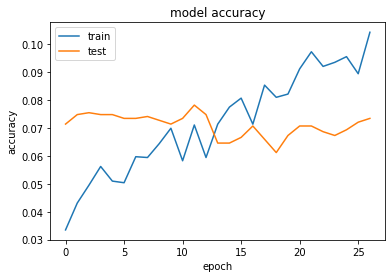

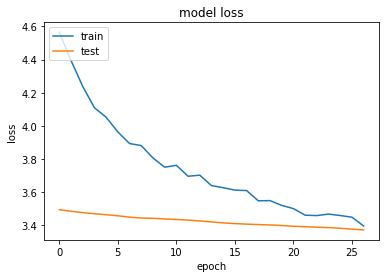

In [90]:
hist_LSTM_deep_s1, model_LSTM_deep_s1 = model_LSTM_deep('model_LSTM_deep_s1',200,512,100,trainX1,trainy1,testX1,testy1,0.001)

In [91]:
df_r

,modle_name,number_units,learing_rate,epochs,test_accuracy
0,model_LSTM_shallow_s1,100,0.001,50,0.079484
1,model_LSTM_deep_s1,200,0.001,100,0.078125


### Applying modles on strategy 2

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100)               42400     
_________________________________________________________________
batch_normalization_5 (Batch (None, 100)               400       
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 34)                3434      
Total params: 46,234
Trainable params: 46,034
Non-trainable params: 200
_________________________________________________________________
Epoch 1/50

Epoch 00001: val_accuracy improved from -inf to 0.03804, saving model to model_ model_LSTM_shallow_s2_100_0.001.hdf5
7/7 - 0s - loss: 4.5985 - accuracy: 0.0285 - val_loss: 3.5490 - val_accuracy: 0.0380
Epoch 2/50

Epoch 00002: val_acc

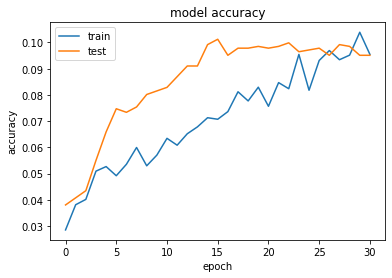

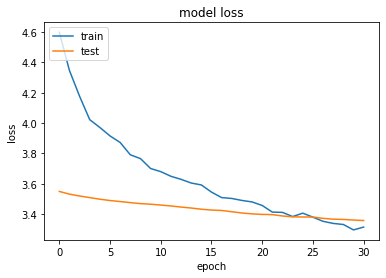

In [92]:
# model_LSTM_shallow(name, units_LSTM, batch_size,epoch,trainX, trainy, testX, testy, learning_rate_LSTM, optimizer='adam')
hist_LSTM_shallow_s2, model_LSTM_shallow_s2  = model_LSTM_shallow(' model_LSTM_shallow_s2',100,512,50,trainX2,trainy2,testX2,testy2,0.001)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 6, 200)            164800    
_________________________________________________________________
batch_normalization_6 (Batch (None, 6, 200)            800       
_________________________________________________________________
dropout_5 (Dropout)          (None, 6, 200)            0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 6, 200)            800       
_________________________________________________________________
lstm_5 (LSTM)                (None, 100)               120400    
_________________________________________________________________
batch_normalization_8 (Batch (None, 100)               400       
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)              

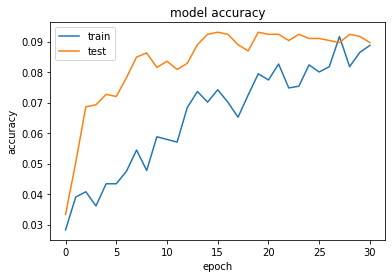

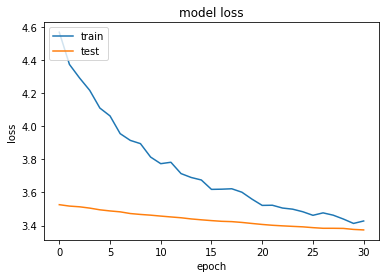

In [93]:
hist_LSTM_deep_s2, model_LSTM_deep_s2 = model_LSTM_deep('model_LSTM_deep_s2',100,512,50,trainX2,trainy2,testX2,testy2,0.001)

In [94]:
df_r

,modle_name,number_units,learing_rate,epochs,test_accuracy
0,model_LSTM_shallow_s1,100,0.001,50,0.079484
1,model_LSTM_deep_s1,200,0.001,100,0.078125
2,model_LSTM_shallow_s2,100,0.001,50,0.101223
3,model_LSTM_deep_s2,100,0.001,50,0.093071


### Applying modles on strategy 3

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 100)               42000     
_________________________________________________________________
batch_normalization_10 (Batc (None, 100)               400       
_________________________________________________________________
dropout_8 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 34)                3434      
Total params: 45,834
Trainable params: 45,634
Non-trainable params: 200
_________________________________________________________________
Epoch 1/50

Epoch 00001: val_accuracy improved from -inf to 0.02717, saving model to model_ model_LSTM_shallow_s3_100_0.001.hdf5
7/7 - 1s - loss: 4.2238 - accuracy: 0.0361 - val_loss: 3.6255 - val_accuracy: 0.0272
Epoch 2/50

Epoch 00002: val_acc

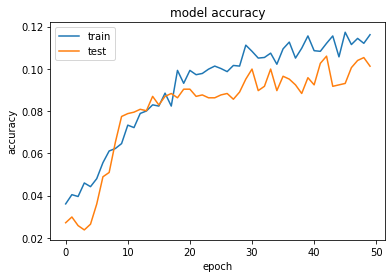

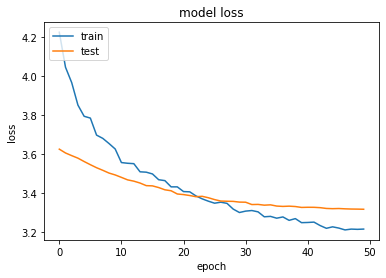

In [95]:
# model_LSTM_shallow(name, units_LSTM, batch_size,epoch,trainX, trainy, testX, testy, learning_rate_LSTM, optimizer='adam')
hist_LSTM_shallow_s3, model_LSTM_shallow_s3  = model_LSTM_shallow(' model_LSTM_shallow_s3',100,512,50,trainX3,trainy3,testX3,testy3,0.001)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 10, 200)           164000    
_________________________________________________________________
batch_normalization_11 (Batc (None, 10, 200)           800       
_________________________________________________________________
dropout_9 (Dropout)          (None, 10, 200)           0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 10, 200)           800       
_________________________________________________________________
lstm_8 (LSTM)                (None, 100)               120400    
_________________________________________________________________
batch_normalization_13 (Batc (None, 100)               400       
_________________________________________________________________
dropout_10 (Dropout)         (None, 100)              

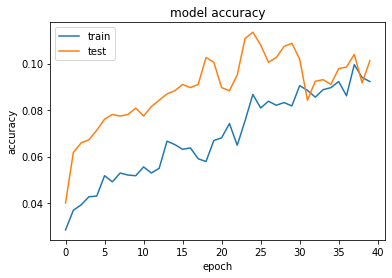

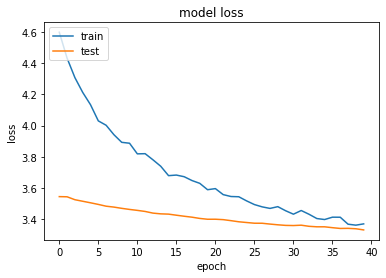

In [96]:
hist_LSTM_deep_s3, model_LSTM_deep_s3 = model_LSTM_deep('model_LSTM_deep_s3',100,512,50,trainX3,trainy3,testX3,testy3,0.001)

In [97]:
df_r

,modle_name,number_units,learing_rate,epochs,test_accuracy
0,model_LSTM_shallow_s1,100,0.001,50,0.079484
1,model_LSTM_deep_s1,200,0.001,100,0.078125
2,model_LSTM_shallow_s2,100,0.001,50,0.101223
3,model_LSTM_deep_s2,100,0.001,50,0.093071
4,model_LSTM_shallow_s3,100,0.001,50,0.105978
5,model_LSTM_deep_s3,100,0.001,50,0.113451


### Applying modles on strategy 4

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 100)               42000     
_________________________________________________________________
batch_normalization_15 (Batc (None, 100)               400       
_________________________________________________________________
dropout_12 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 34)                3434      
Total params: 45,834
Trainable params: 45,634
Non-trainable params: 200
_________________________________________________________________
Epoch 1/50

Epoch 00001: val_accuracy improved from -inf to 0.02514, saving model to model_ model_LSTM_shallow_s4_100_0.001.hdf5
7/7 - 1s - loss: 4.3507 - accuracy: 0.0285 - val_loss: 3.6492 - val_accuracy: 0.0251
Epoch 2/50

Epoch 00002: val_acc

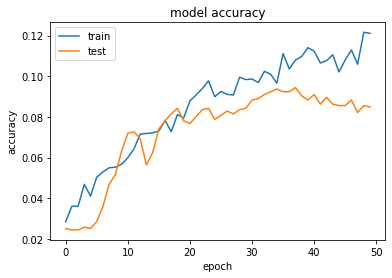

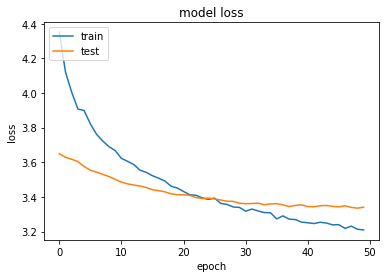

In [98]:
# model_LSTM_shallow(name, units_LSTM, batch_size,epoch,trainX, trainy, testX, testy, learning_rate_LSTM, optimizer='adam')
hist_LSTM_shallow_s4, model_LSTM_shallow_s4  = model_LSTM_shallow(' model_LSTM_shallow_s4',100,512,50,trainX4,trainy4,testX4,testy4,0.001)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 10, 200)           164000    
_________________________________________________________________
batch_normalization_16 (Batc (None, 10, 200)           800       
_________________________________________________________________
dropout_13 (Dropout)         (None, 10, 200)           0         
_________________________________________________________________
batch_normalization_17 (Batc (None, 10, 200)           800       
_________________________________________________________________
lstm_11 (LSTM)               (None, 100)               120400    
_________________________________________________________________
batch_normalization_18 (Batc (None, 100)               400       
_________________________________________________________________
dropout_14 (Dropout)         (None, 100)              

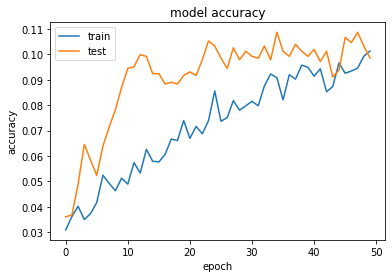

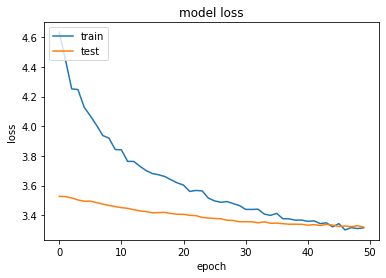

In [99]:
hist_LSTM_deep_s4, model_LSTM_deep_s4 = model_LSTM_deep('model_LSTM_deep_s4',100,512,50,trainX4,trainy4,testX4,testy4,0.001)

In [100]:
df_r

,modle_name,number_units,learing_rate,epochs,test_accuracy
0,model_LSTM_shallow_s1,100,0.001,50,0.079484
1,model_LSTM_deep_s1,200,0.001,100,0.078125
2,model_LSTM_shallow_s2,100,0.001,50,0.101223
3,model_LSTM_deep_s2,100,0.001,50,0.093071
4,model_LSTM_shallow_s3,100,0.001,50,0.105978
5,model_LSTM_deep_s3,100,0.001,50,0.113451
6,model_LSTM_shallow_s4,100,0.001,50,0.094429
7,model_LSTM_deep_s4,100,0.001,50,0.108696


### This show that our startegy 1 works best with best reults and model_LSTM_deep_s1 gives best reults

# USing GRU 

In [101]:
def model_GRU_shallow(name,units_GRU, batch_size,epoch,trainX, trainy, testX, testy, learning_rate_GRU, optimizer='adam'):
    
    # design network
    model = Sequential()
    model.add(GRU(units=units_GRU, input_shape=(trainX.shape[1], trainX.shape[2])))
    
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(num_classes,activation="softmax"))
    
    opt = tf.keras.optimizers.Adam(learning_rate=learning_rate_GRU)
  
    model.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])

    model.summary()
    
    # fit network
 
    es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=15, baseline=0.01, restore_best_weights=True)



    filepath = 'model_'+str(name)+'_'+str(units_GRU)+'_'+str(learning_rate_GRU)+'.hdf5'
#     filepath = 'my_best_model.hdf5'
    checkpoint = ModelCheckpoint( 
                                filepath=filepath,
                                 monitor='val_accuracy',
                                 verbose=1, 
                                 save_best_only=True,
                                 mode='max')
    now = datetime.now
    
    t= now()

    history = model.fit(trainX, trainy, epochs=epoch, batch_size=batch_size, 
                        validation_data=(testX, testy), verbose=2, shuffle=True,
                        callbacks=[checkpoint,es])
    
    print('Training time: %s' % (now() - t))
 
    
    model_w= load_model(filepath)
    
    score = model_w.evaluate(testX, testy, verbose=0)
    print('Test score:', score[0])
    print('Test accuracy:', score[1])

    # list all data in history
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    global df_r
    
    df_r=df_r.append({'modle_name':name,'number_units':units_GRU,'learing_rate': learning_rate_GRU,
                      'epochs':epoch,'test_accuracy':score[1]},ignore_index=True)

    
    
    return(history,model)


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 100)               32100     
_________________________________________________________________
batch_normalization_20 (Batc (None, 100)               400       
_________________________________________________________________
dropout_16 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 34)                3434      
Total params: 35,934
Trainable params: 35,734
Non-trainable params: 200
_________________________________________________________________
Epoch 1/50

Epoch 00001: val_accuracy improved from -inf to 0.04620, saving model to model_model_GRU_shallow_s1_100_0.001.hdf5
7/7 - 1s - loss: 4.6197 - accuracy: 0.0274 - val_loss: 3.5844 - val_accuracy: 0.0462
Epoch 2/50

Epoch 00002: val_accur

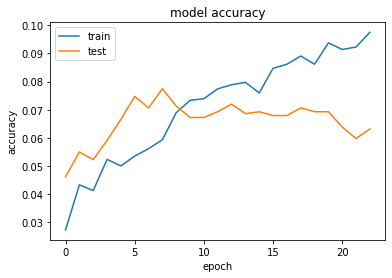

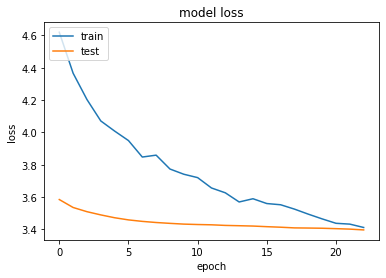

In [102]:
# model_GRU_shallow(units_GRU, batch_size,epoch,trainX, trainy, testX, testy, learning_rate_GRU, optimizer='adam')
hist_GRU_shallow_s1, model_GRU_shallow_s1  = model_GRU_shallow('model_GRU_shallow_s1',100,512,50,trainX1,trainy1,testX1,testy1,0.001)

In [103]:
df_r

,modle_name,number_units,learing_rate,epochs,test_accuracy
0,model_LSTM_shallow_s1,100,0.001,50,0.079484
1,model_LSTM_deep_s1,200,0.001,100,0.078125
2,model_LSTM_shallow_s2,100,0.001,50,0.101223
3,model_LSTM_deep_s2,100,0.001,50,0.093071
4,model_LSTM_shallow_s3,100,0.001,50,0.105978
5,model_LSTM_deep_s3,100,0.001,50,0.113451
6,model_LSTM_shallow_s4,100,0.001,50,0.094429
7,model_LSTM_deep_s4,100,0.001,50,0.108696
8,model_GRU_shallow_s1,100,0.001,50,0.077446


# Using Bidirectional LSTM

In [104]:
def model_bidrectional_LSTM_deep(name,units_bidrectional_LSTM, batch_size,epoch,trainX, trainy, testX, testy, learning_rate_bidrectional_LSTM, optimizer='adam'):
    
    # design network
    model = Sequential()
    model.add(Bidirectional(LSTM(units=units_bidrectional_LSTM,return_sequences=True),
                            input_shape=(trainX.shape[1], trainX.shape[2])))
    
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Bidirectional(LSTM (75, dropout=0.5)))
    model.add(Dense(num_classes,activation="softmax"))
    
    opt = tf.keras.optimizers.Adam(learning_rate=learning_rate_bidrectional_LSTM)
  
    model.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])

    model.summary()
    
    # fit network
 
    es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=15, baseline=0.01, restore_best_weights=True)



    filepath = 'model_'+str(name)+'_'+str(units_bidrectional_LSTM)+'_'+str(learning_rate_bidrectional_LSTM)+'.hdf5'
#     filepath = 'my_best_model.hdf5'
    checkpoint = ModelCheckpoint( 
                                filepath=filepath,
                                 monitor='val_accuracy',
                                 verbose=1, 
                                 save_best_only=True,
                                 mode='max')
    now = datetime.now
    
    t= now()

    history = model.fit(trainX, trainy, epochs=epoch, batch_size=batch_size, 
                        validation_data=(testX, testy), verbose=2, shuffle=False,
                        callbacks=[checkpoint,es])
    
    print('Training time: %s' % (now() - t))
 
    
    model_w= load_model(filepath)
    
    score = model_w.evaluate(testX, testy, verbose=0)
    print('Test score:', score[0])
    print('Test accuracy:', score[1])

    # list all data in history
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    global df_r
    
    df_r=df_r.append({'modle_name':name,'number_units':units_bidrectional_LSTM,'learing_rate': learning_rate_bidrectional_LSTM,
                      'epochs':epoch,'test_accuracy':score[1]},ignore_index=True)

    
    
    return(history,model)


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 6, 200)            84800     
_________________________________________________________________
batch_normalization_21 (Batc (None, 6, 200)            800       
_________________________________________________________________
dropout_17 (Dropout)         (None, 6, 200)            0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 150)               165600    
_________________________________________________________________
dense_13 (Dense)             (None, 34)                5134      
Total params: 256,334
Trainable params: 255,934
Non-trainable params: 400
_________________________________________________________________
Epoch 1/50

Epoch 00001: val_accuracy improved from -inf to 0.03057, saving model to model_model_bidrectional_LS

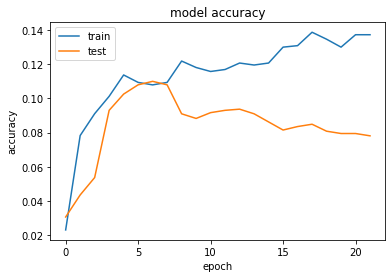

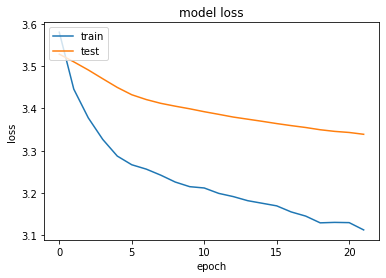

In [105]:
# model_bidrectional_LSTM_shallow(units_LSTM, batch_size,epoch,trainX, trainy, testX, testy, learning_rate_LSTM, optimizer='adam')
hist_bidrectional_LSTM_shallow_s1, model_bidrectional_LSTM_deep_s1  = model_bidrectional_LSTM_deep('model_bidrectional_LSTM_deep_s1',100,512,50,trainX1,trainy1,testX1,testy1,0.001)

In [106]:
df_r

,modle_name,number_units,learing_rate,epochs,test_accuracy
0,model_LSTM_shallow_s1,100,0.001,50,0.079484
1,model_LSTM_deep_s1,200,0.001,100,0.078125
2,model_LSTM_shallow_s2,100,0.001,50,0.101223
3,model_LSTM_deep_s2,100,0.001,50,0.093071
4,model_LSTM_shallow_s3,100,0.001,50,0.105978
5,model_LSTM_deep_s3,100,0.001,50,0.113451
6,model_LSTM_shallow_s4,100,0.001,50,0.094429
7,model_LSTM_deep_s4,100,0.001,50,0.108696
8,model_GRU_shallow_s1,100,0.001,50,0.077446
9,model_bidrectional_LSTM_deep_s1,100,0.001,50,0.110054


In [107]:
def model_bidrectional_LSTM_shallow(name,units_bidrectional_LSTM, batch_size,epoch,trainX, trainy, testX, testy, learning_rate_bidrectional_LSTM, optimizer='adam'):
    
    # design network
    model = Sequential()
    model.add(Bidirectional(LSTM(units=units_bidrectional_LSTM),
                            input_shape=(trainX.shape[1], trainX.shape[2])))
    
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    # model.add(Bidirectional(LSTM (75, dropout=0.5)))
    model.add(Dense(num_classes,activation="softmax"))
    
    opt = tf.keras.optimizers.Adam(learning_rate=learning_rate_bidrectional_LSTM)
  
    model.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])

    model.summary()
    
    # fit network
 
    es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=15, baseline=0.01, restore_best_weights=True)



    filepath = 'model_'+str(name)+'_'+str(units_bidrectional_LSTM)+'_'+str(learning_rate_bidrectional_LSTM)+'.hdf5'
#     filepath = 'my_best_model.hdf5'
    checkpoint = ModelCheckpoint( 
                                filepath=filepath,
                                 monitor='val_accuracy',
                                 verbose=1, 
                                 save_best_only=True,
                                 mode='max')
    now = datetime.now
    
    t= now()

    history = model.fit(trainX, trainy, epochs=epoch, batch_size=batch_size, 
                        validation_data=(testX, testy), verbose=2, shuffle=True,
                        callbacks=[checkpoint,es])
    
    print('Training time: %s' % (now() - t))
 
    
    model_w= load_model(filepath)
    
    score = model_w.evaluate(testX, testy, verbose=0)
    print('Test score:', score[0])
    print('Test accuracy:', score[1])

    # list all data in history
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    global df_r
    
    df_r=df_r.append({'modle_name':name,'number_units':units_bidrectional_LSTM,'learing_rate': learning_rate_bidrectional_LSTM,
                      'epochs':epoch,'test_accuracy':score[1]},ignore_index=True)

    
    
    return(history,model)


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_2 (Bidirection (None, 200)               84800     
_________________________________________________________________
batch_normalization_22 (Batc (None, 200)               800       
_________________________________________________________________
dropout_18 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 34)                6834      
Total params: 92,434
Trainable params: 92,034
Non-trainable params: 400
_________________________________________________________________
Epoch 1/50

Epoch 00001: val_accuracy improved from -inf to 0.04008, saving model to model_ model_bidrectional_LSTM_shallow_s1_100_0.001.hdf5
7/7 - 1s - loss: 4.4605 - accuracy: 0.0396 - val_loss: 3.5271 - val_accuracy: 0.0401
Epoch 2/50

Epoch 

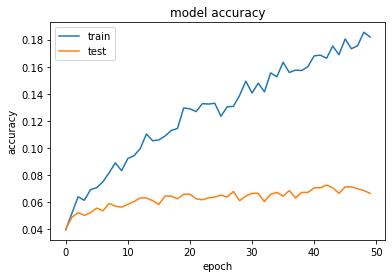

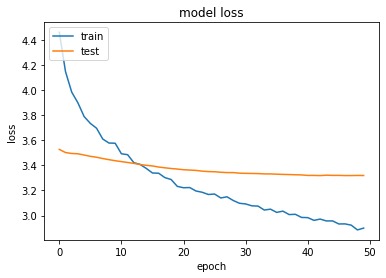

In [108]:
# model_bidrectional_LSTM_shallow(units_LSTM, batch_size,epoch,trainX, trainy, testX, testy, learning_rate_LSTM, optimizer='adam')
hist_bidrectional_LSTM_shallow_s1, model_bidrectional_LSTM_shallow_s1  = model_bidrectional_LSTM_shallow(' model_bidrectional_LSTM_shallow_s1',100,512,50,trainX1,trainy1,testX1,testy1,0.001)

In [109]:
df_r

,modle_name,number_units,learing_rate,epochs,test_accuracy
0,model_LSTM_shallow_s1,100,0.001,50,0.079484
1,model_LSTM_deep_s1,200,0.001,100,0.078125
2,model_LSTM_shallow_s2,100,0.001,50,0.101223
3,model_LSTM_deep_s2,100,0.001,50,0.093071
4,model_LSTM_shallow_s3,100,0.001,50,0.105978
...,...,...,...,...,...
6,model_LSTM_shallow_s4,100,0.001,50,0.094429
7,model_LSTM_deep_s4,100,0.001,50,0.108696
8,model_GRU_shallow_s1,100,0.001,50,0.077446
9,model_bidrectional_LSTM_deep_s1,100,0.001,50,0.110054


# Using simple RNN

In [110]:
def model_RNN_shallow(name,units_RNN, batch_size,epoch,trainX, trainy, testX, testy, learning_rate_RNN, optimizer='adam'):
    
    # design network
    model = Sequential()
    model.add(SimpleRNN(units=units_RNN, input_shape=(trainX.shape[1], trainX.shape[2])))
    
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(num_classes,activation="softmax"))
    
    opt = tf.keras.optimizers.Adam(learning_rate=learning_rate_RNN)
  
    model.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])

    model.summary()
    
    # fit network
 
    es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=15, baseline=0.01, restore_best_weights=True)



    filepath = 'model_'+str(name)+'_'+str(units_RNN)+'_'+str(learning_rate_RNN)+'.hdf5'
#     filepath = 'my_best_model.hdf5'
    checkpoint = ModelCheckpoint( 
                                filepath=filepath,
                                 monitor='val_accuracy',
                                 verbose=1, 
                                 save_best_only=True,
                                 mode='max')
    now = datetime.now
    
    t= now()

    history = model.fit(trainX, trainy, epochs=epoch, batch_size=batch_size, 
                        validation_data=(testX, testy), verbose=2, shuffle=True,
                        callbacks=[checkpoint,es])
    
    print('Training time: %s' % (now() - t))
 
    
    model_w= load_model(filepath)
    
    score = model_w.evaluate(testX, testy, verbose=0)
    print('Test score:', score[0])
    print('Test accuracy:', score[1])

    # list all data in history
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    global df_r
    
    df_r=df_r.append({'modle_name':name,'number_units':units_RNN,'learing_rate': learning_rate_RNN,
                      'epochs':epoch,'test_accuracy':score[1]},ignore_index=True)

    
    
    return(history,model)


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 100)               10600     
_________________________________________________________________
batch_normalization_23 (Batc (None, 100)               400       
_________________________________________________________________
dropout_19 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 34)                3434      
Total params: 14,434
Trainable params: 14,234
Non-trainable params: 200
_________________________________________________________________
Epoch 1/50

Epoch 00001: val_accuracy improved from -inf to 0.03193, saving model to model_ model_RNN_shallow_s1_100_0.001.hdf5
7/7 - 0s - loss: 4.7915 - accuracy: 0.0306 - val_loss: 3.8607 - val_accuracy: 0.0319
Epoch 2/50

Epoch 00002: val_acc

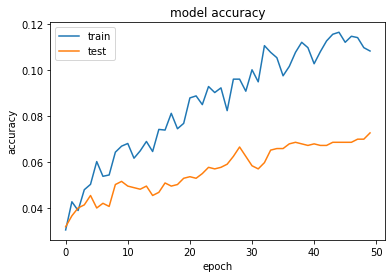

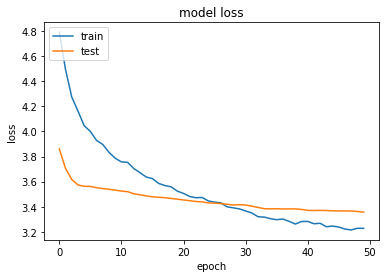

In [111]:
# model_RNN_shallow(units_RNN, batch_size,epoch,trainX, trainy, testX, testy, learning_rate_RNN, optimizer='adam')
hist_RNN_shallow_s1, model_RNN_shallow_s1  = model_RNN_shallow(' model_RNN_shallow_s1',100,512,50,trainX1,trainy1,testX1,testy1,0.001)

In [112]:
df_r

,modle_name,number_units,learing_rate,epochs,test_accuracy
0,model_LSTM_shallow_s1,100,0.001,50,0.079484
1,model_LSTM_deep_s1,200,0.001,100,0.078125
2,model_LSTM_shallow_s2,100,0.001,50,0.101223
3,model_LSTM_deep_s2,100,0.001,50,0.093071
4,model_LSTM_shallow_s3,100,0.001,50,0.105978
...,...,...,...,...,...
7,model_LSTM_deep_s4,100,0.001,50,0.108696
8,model_GRU_shallow_s1,100,0.001,50,0.077446
9,model_bidrectional_LSTM_deep_s1,100,0.001,50,0.110054
10,model_bidrectional_LSTM_shallow_s1,100,0.001,50,0.072690


# Doing hyper parameter tuning

#### we have seen as the strategy one was giving best results so we will find the tuned hyper parameters for it for all models

### Optimal hyperparameter values for RNN

In [113]:
def model_builder_RNN(hp):

    model = Sequential()
    hp_units = hp.Int('units', min_value=10, max_value=220, step=20)
    model.add(SimpleRNN(units=hp_units, input_shape=(trainX1.shape[1], trainX1.shape[2])))
    
    
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(num_classes,activation="softmax"))
    
    
    # model.add(Dense(1))
    
    hp_learning_rate = hp.Choice('learning_rate', values=[0.1, 1e-2, 1e-3])
    
    opt = tf.keras.optimizers.Adam(learning_rate=hp_learning_rate)
    
    model.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])
    
    # model.compile(loss='mean_squared_error', optimizer=opt)

    model.summary()
    
    return model

tuner = kt.Hyperband(model_builder_RNN,
                     objective='val_loss',
                     max_epochs=150,
                     factor=3,
                     directory='RNN',
                     project_name='opt_hyp_RNN')


tuner.search(trainX1, trainy1, epochs=150, batch_size=512, validation_data=(testX1, testy1), verbose=2, shuffle=False)

best_hps_RNN=tuner.get_best_hyperparameters(num_trials=1)[0]


print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps_RNN.get('units')} and the optimal learning rate for the optimizer
is {best_hps_RNN.get('learning_rate')}.
""")

units_RNN=best_hps_RNN.get('units')
learning_rate_RNN=best_hps_RNN.get('learning_rate')


Trial 28 Complete [00h 00m 02s]
val_loss: 5.0677876472473145

Best val_loss So Far: 3.3506546020507812
Total elapsed time: 00h 01m 17s


Oracle triggered exit



The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 30 and the optimal learning rate for the optimizer
is 0.1.



### Optimal hyperparameter values for LSTM

In [114]:
def model_builder_LSTM(hp):

    model = Sequential()
    hp_units = hp.Int('units', min_value=10, max_value=220, step=20)
    model.add(LSTM(units=hp_units, input_shape=(trainX1.shape[1], trainX1.shape[2])))
    
    
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(num_classes,activation="softmax"))
    
    
    # model.add(Dense(1))
    
    hp_learning_rate = hp.Choice('learning_rate', values=[0.1, 1e-2, 1e-3])
    
    opt = tf.keras.optimizers.Adam(learning_rate=hp_learning_rate)
    
    model.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])
    
    # model.compile(loss='mean_squared_error', optimizer=opt)

    model.summary()
    
    return model

tuner = kt.Hyperband(model_builder_LSTM,
                     objective='val_loss',
                     max_epochs=150,
                     factor=3,
                     directory='LSTM',
                     project_name='opt_hyp_LSTM')


tuner.search(trainX1, trainy1, epochs=150, batch_size=512, validation_data=(testX1, testy1), verbose=2, shuffle=False)

best_hps_LSTM=tuner.get_best_hyperparameters(num_trials=1)[0]


print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps_LSTM.get('units')} and the optimal learning rate for the optimizer
is {best_hps_LSTM.get('learning_rate')}.
""")

units_LSTM=best_hps_LSTM.get('units')
learning_rate_LSTM=best_hps_LSTM.get('learning_rate')


Oracle triggered exit


Trial 32 Complete [00h 00m 04s]
val_loss: 3.441741704940796

Best val_loss So Far: 3.3345160484313965
Total elapsed time: 00h 02m 21s

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 30 and the optimal learning rate for the optimizer
is 0.1.



### Optimal hyperparameter values for GRU

In [115]:
def model_builder_GRU(hp):

    model = Sequential()
    hp_units = hp.Int('units', min_value=10, max_value=220, step=20)
    model.add(GRU(units=hp_units, input_shape=(trainX1.shape[1], trainX1.shape[2])))
    
    
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(num_classes,activation="softmax"))
    
    
    # model.add(Dense(1))
    
    hp_learning_rate = hp.Choice('learning_rate', values=[0.1, 1e-2, 1e-3])
    
    opt = tf.keras.optimizers.Adam(learning_rate=hp_learning_rate)
    
    model.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])
    
    # model.compile(loss='mean_squared_error', optimizer=opt)

    model.summary()
    
    return model

tuner = kt.Hyperband(model_builder_GRU,
                     objective='val_loss',
                     max_epochs=150,
                     factor=3,
                     directory='GRU',
                     project_name='opt_hyp_GRU')


tuner.search(trainX1, trainy1, epochs=150, batch_size=512, validation_data=(testX1, testy1), verbose=2, shuffle=False)

best_hps_GRU=tuner.get_best_hyperparameters(num_trials=1)[0]


print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps_GRU.get('units')} and the optimal learning rate for the optimizer
is {best_hps_GRU.get('learning_rate')}.
""")

units_GRU=best_hps_GRU.get('units')
learning_rate_GRU=best_hps_GRU.get('learning_rate')


Oracle triggered exit


Trial 31 Complete [00h 00m 05s]
val_loss: 3.501070022583008

Best val_loss So Far: 3.314429998397827
Total elapsed time: 00h 02m 29s

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 30 and the optimal learning rate for the optimizer
is 0.1.



### Optimal hyperparameter values for Bidirectional LSTM

In [116]:
def model_builder_Bidirection_LSTM(hp):

    model = Sequential()
    hp_units = hp.Int('units', min_value=10, max_value=220, step=20)
    
    model.add(Bidirectional(LSTM(units=hp_units,return_sequences=False),
                            input_shape=(trainX1.shape[1], trainX1.shape[2])))
    
    
    
    
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(num_classes,activation="softmax"))
    
    
    # model.add(Dense(1))
    
    hp_learning_rate = hp.Choice('learning_rate', values=[0.1, 1e-2, 1e-3])
    
    opt = tf.keras.optimizers.Adam(learning_rate=hp_learning_rate)
    
    model.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])
    
    # model.compile(loss='mean_squared_error', optimizer=opt)

    model.summary()
    
    return model

tuner = kt.Hyperband(model_builder_Bidirection_LSTM,
                     objective='val_loss',
                     max_epochs=150,
                     factor=3,
                     directory='LSTM',
                     project_name='opt_hyp_Bidirection_LSTM')


tuner.search(trainX1, trainy1, epochs=150, batch_size=512, validation_data=(testX1, testy1), verbose=2, shuffle=False)

best_hps_Bidirection_LSTM=tuner.get_best_hyperparameters(num_trials=1)[0]


print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps_Bidirection_LSTM.get('units')} and the optimal learning rate for the optimizer
is {best_hps_Bidirection_LSTM.get('learning_rate')}.
""")

units_Bidirection_LSTM=best_hps_Bidirection_LSTM.get('units')
learning_rate_Bidirection_LSTM=best_hps_Bidirection_LSTM.get('learning_rate')


Oracle triggered exit


Trial 29 Complete [00h 00m 07s]
val_loss: 3.4989030361175537

Best val_loss So Far: 3.347893714904785
Total elapsed time: 00h 03m 14s

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 10 and the optimal learning rate for the optimizer
is 0.1.



# Applying the optimal hyper parameters

### For RNN

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 30)                1080      
_________________________________________________________________
batch_normalization_1 (Batch (None, 30)                120       
_________________________________________________________________
dropout_1 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 34)                1054      
Total params: 2,254
Trainable params: 2,194
Non-trainable params: 60
_________________________________________________________________
Epoch 1/50

Epoch 00001: val_accuracy improved from -inf to 0.06793, saving model to model_model_RNN_shallow_s1_optimal_30_0.1.hdf5
7/7 - 0s - loss: 3.7683 - accuracy: 0.0570 - val_loss: 3.4366 - val_accuracy: 0.0679
Epoch 2/50

Epoch 00002: val_acc

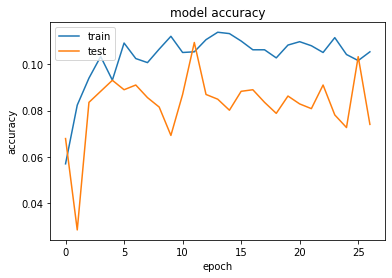

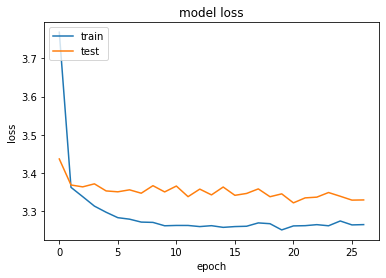

In [118]:
# model_RNN_shallow(units_RNN, batch_size,epoch,trainX, trainy, testX, testy, learning_rate_RNN, optimizer='adam')
hist_RNN_shallow_s1, model_RNN_shallow_s1  = model_RNN_shallow('model_RNN_shallow_s1_optimal',units_RNN,512,50,trainX1,trainy1,testX1,testy1,learning_rate_RNN)

### For Bidirectional LSTM

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 20)                1280      
_________________________________________________________________
batch_normalization_2 (Batch (None, 20)                80        
_________________________________________________________________
dropout_2 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 34)                714       
Total params: 2,074
Trainable params: 2,034
Non-trainable params: 40
_________________________________________________________________
Epoch 1/50

Epoch 00001: val_accuracy improved from -inf to 0.00747, saving model to model_ model_bidrectional_LSTM_shallow_s1_optimal_10_0.1.hdf5
7/7 - 1s - loss: 3.6045 - accuracy: 0.0643 - val_loss: 3.4059 - val_accuracy: 0.0075
Epoch 2/50

Epoch

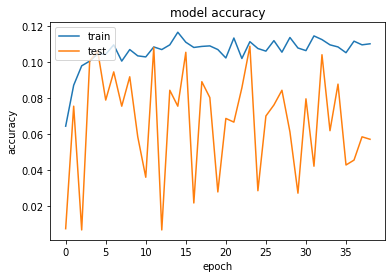

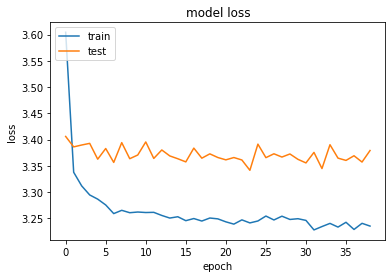

In [119]:
# model_bidrectional_LSTM_shallow(units_LSTM, batch_size,epoch,trainX, trainy, testX, testy, learning_rate_LSTM, optimizer='adam')
hist_bidrectional_LSTM_shallow_s1, model_bidrectional_LSTM_shallow_s1  = model_bidrectional_LSTM_shallow(' model_bidrectional_LSTM_shallow_s1_optimal',
                                                                                                         units_Bidirection_LSTM,512,50,trainX1,trainy1,
                                                                                                         testX1,testy1,learning_rate_Bidirection_LSTM)


### For GRU

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 30)                3330      
_________________________________________________________________
batch_normalization_3 (Batch (None, 30)                120       
_________________________________________________________________
dropout_3 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 34)                1054      
Total params: 4,504
Trainable params: 4,444
Non-trainable params: 60
_________________________________________________________________
Epoch 1/50

Epoch 00001: val_accuracy improved from -inf to 0.07541, saving model to model_model_GRU_shallow_s1_optimal_30_0.1.hdf5
7/7 - 1s - loss: 3.7329 - accuracy: 0.0614 - val_loss: 3.3997 - val_accuracy: 0.0754
Epoch 2/50

Epoch 00002: val_acc

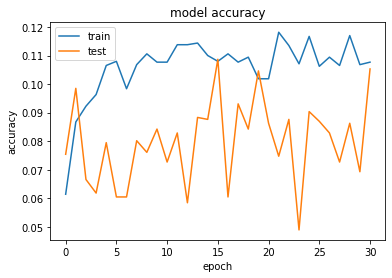

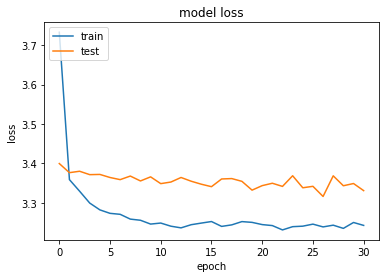

In [120]:

# model_GRU_shallow(units_GRU, batch_size,epoch,trainX, trainy, testX, testy, learning_rate_GRU, optimizer='adam')
hist_GRU_shallow_s1, model_GRU_shallow_s1  = model_GRU_shallow('model_GRU_shallow_s1_optimal',units_GRU,512,50,trainX1,trainy1,testX1,testy1,learning_rate_GRU)

### For LSTM

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 30)                4320      
_________________________________________________________________
batch_normalization_4 (Batch (None, 30)                120       
_________________________________________________________________
dropout_4 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 34)                1054      
Total params: 5,494
Trainable params: 5,434
Non-trainable params: 60
_________________________________________________________________
Epoch 1/50

Epoch 00001: val_accuracy improved from -inf to 0.09307, saving model to model_ model_LSTM_shallow_s1_optimal_30_0.1.hdf5
7/7 - 1s - loss: 3.7571 - accuracy: 0.0483 - val_loss: 3.3268 - val_accuracy: 0.0931
Epoch 2/50

Epoch 00002: val_a

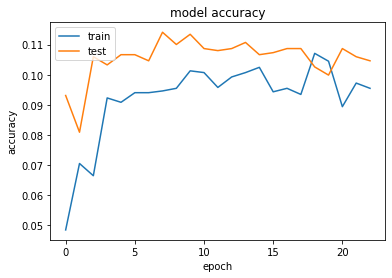

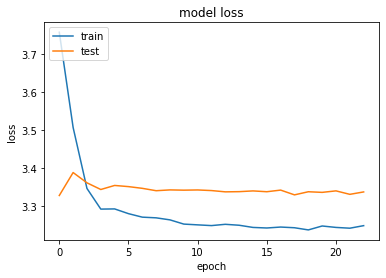

In [121]:
# model_LSTM_shallow(units_LSTM, batch_size,epoch,trainX, trainy, testX, testy, learning_rate_LSTM, optimizer='adam')
hist_LSTM_shallow_s1, model_LSTM_shallow_s1  = model_LSTM_shallow(' model_LSTM_shallow_s1_optimal',units_LSTM,512,50,trainX1,trainy1,testX1,testy1,learning_rate_LSTM)

In [122]:
df_r

,modle_name,number_units,learing_rate,epochs,test_accuracy
0,model_LSTM_shallow_s1,100,0.001,50,0.079484
1,model_LSTM_deep_s1,200,0.001,100,0.078125
2,model_LSTM_shallow_s2,100,0.001,50,0.101223
3,model_LSTM_deep_s2,100,0.001,50,0.093071
4,model_LSTM_shallow_s3,100,0.001,50,0.105978
...,...,...,...,...,...
11,model_RNN_shallow_s1,100,0.001,50,0.072690
12,model_RNN_shallow_s1_optimal,30,0.100,50,0.109375
13,model_bidrectional_LSTM_shallow_s1_optimal,10,0.100,50,0.108696
14,model_GRU_shallow_s1_optimal,30,0.100,50,0.108696


In [124]:
df_r_sorted=df_r.sort_values('test_accuracy',ascending=False)
df_r_sorted

,modle_name,number_units,learing_rate,epochs,test_accuracy
15,model_LSTM_shallow_s1_optimal,30,0.100,50,0.114130
5,model_LSTM_deep_s3,100,0.001,50,0.113451
9,model_bidrectional_LSTM_deep_s1,100,0.001,50,0.110054
12,model_RNN_shallow_s1_optimal,30,0.100,50,0.109375
7,model_LSTM_deep_s4,100,0.001,50,0.108696
...,...,...,...,...,...
0,model_LSTM_shallow_s1,100,0.001,50,0.079484
1,model_LSTM_deep_s1,200,0.001,100,0.078125
8,model_GRU_shallow_s1,100,0.001,50,0.077446
10,model_bidrectional_LSTM_shallow_s1,100,0.001,50,0.072690


## This shows that our strategty 1 gives better results

### Saving test values for our recommender system APP

In [125]:
abf[abf['unique_products_length']==abf['unique_products_length'].max()]

,Description,unique_products_length
CustomerID,,
12748.0,"[26, 14, 21, 17, 10, 31, 9, 18, 25, 22, 15, 19, 12, 11, 32, 30, 1, 16, 8, 2, 5, 3, 20, 6, 28, 4, 13, 27, 33, 23, 7, 29, 24]",33


In [126]:

x_s1=abf.loc[12748.0,'Description']

x_s1=np.array(x_s1)
x_s1=x_s1[:30]
x_s1

array([26, 14, 21, 17, 10, 31,  9, 18, 25, 22, 15, 19, 12, 11, 32, 30,  1,
       16,  8,  2,  5,  3, 20,  6, 28,  4, 13, 27, 33, 23])

In [127]:
### Saving this x_s1
pickle.dump(x_s1, open('x_s1', 'wb'))

In [128]:
cbf[cbf['products_length']==cbf['products_length'].max()]

,Description,time,products_length
CustomerID,,,
17841.0,"[4, 27, 5, 12, 12, 4, 26, 9, 32, 32, 11, 9, 1, 33, 9, 5, 31, 8, 4, 24, 5, 16, 6, 5, 10, 5, 19, 10, 10, 6, 5, 14, 17, 16, 18, 15, 12, 14, 5, 8, 11, 10, 9, 12, 12, 31, 18, 22, 14, 17, 19, 16, 17, 17, 11, 31, 19, 22, 15, 14, 17, 16, 15, 22, 33, 15, 18, 14, 11, 17, 16, 14, 15, 22, 19, 11, 9, 31, 18, 12, 19, 20, 16, 8, 17, 19, 12, 18, 15, 14, 14, 16, 12, 24, 22, 28, 30, 9, 15, 14, ...]","[365, 365, 365, 370, 373, 378, 378, 383, 383, 399, 399, 399, 404, 404, 404, 407, 407, 411, 411, 411, 411, 421, 425, 425, 425, 428, 448, 448, 454, 454, 454, 457, 457, 457, 457, 457, 461, 461, 461, 464, 464, 464, 464, 464, 464, 464, 464, 468, 468, 468, 468, 472, 472, 482, 482, 482, 485, 485, 485, 485, 485, 485, 485, 490, 490, 490, 490, 490, 496, 496, 496, 496, 496, 496, 499, 499, 499, 503, 512, 512, 512, 512, 518, 518, 518, 518, 518, 518, 518, 518, 521, 521, 521, 521, 521, 525, 525, 525, 525, 525, ...]",694


In [129]:

x_s2=cbf.loc[17841.0,'Description']

x_s2=np.array(x_s2)
x_s2=x_s2[:30]

In [130]:
### Saving this x_s2
pickle.dump(x_s2, open('x_s2', 'wb'))

### Making a que to take inputs for our recommender system APP on stream lit

In [131]:
from collections import deque
import numpy as np

# Create a deque with a maximum length of 5
dq = deque(maxlen=30)

# Append some elements to the deque
z=  np.zeros(30)

for i in range(len(z)):
    dq.append(z[i])


In [132]:
dq.append(0)
dq

deque([0.0,
       0.0,
       0.0,
       0.0,
       0.0,
       0.0,
       0.0,
       0.0,
       0.0,
       0.0,
       0.0,
       0.0,
       0.0,
       0.0,
       0.0,
       0.0,
       0.0,
       0.0,
       0.0,
       0.0,
       0.0,
       0.0,
       0.0,
       0.0,
       0.0,
       0.0,
       0.0,
       0.0,
       0.0,
       0])

In [133]:
np.zeros(30)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [134]:
### Saving this dq
pickle.dump(dq, open('dq', 'wb'))

In [135]:
np.array(dq)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

# Best model

#### Loading best model

In [143]:
filepath = 'model_ model_bidrectional_LSTM_shallow_s1_optimal_10_0.1.hdf5'
model_best= load_model(filepath)

### preidct

In [144]:
ypred=model_best.predict(testX1)

In [145]:
len(ypred)

1472

In [146]:
ypred.shape

(1472, 34)

In [147]:
np.argmax(ypred[112])

25

#### Recommended product

In [148]:
v=np.argmax(ypred[7])
v=int(v)
v=v-1 # 1 is subtracted as it was added to make labels from 1 to 34

ar=np.array([v])  
ar.shape
description_label.inverse_transform(ar)

array(['REGENCY CAKESTAND 3 TIER'], dtype=object)

#### Saving best model

In [149]:
tf.keras.models.save_model(model_best, 'best_model.h5')

#### A web app on stremalit is build to test and check the best model of our recommender system 

# Conclusion

## Key points:

1. We applied 4 strategies for building a sequence for our recommender systems out of these 4 strategies strategy 1 worked best and gave better results

2. There were amny customers who had made less pruchases hence they could not be included in the sequence

3. Hper parameter tuning of the number of units and learning rate was done using Keras Tuner

4. Due to Less amount of data customers the model performance was ordinary

# Recommendations & Future Work

## Key points:

1. Getting more data of customers to make model perform better
2. If we large amount of data for an indvidual customer his buying pattern can also be recomginsed and a personal recommendation system for a user can be built



## Problems faced

1. large amount of time was consumed trying differnt sequences with the amount of data was available
2. Many deep RNN were tried to increase model accuracy but it was causing overfitting of model